In [ ]:
การแยก Spam กับ Ham
Due August 28, 2023 11:59 PM
Instructions
1 ให้นิสิตทำการ implement เพื่อสร้าง model ในการแยกข้อมูลข้อความที่เป็น Spam และ Ham จากไฟล์ spam.xls
2 เปรียบเทียบการทำงานของ 2 model โดยหนึ่งในนั้นต้องเป็น Neural Network และนิสิตสามารถเลือก model อื่น ๆอีก 1 model
3 .ในนิสิตอธิบายสรุปสุดท้ายว่ากระบวนการทำงานของนิสิตมีอะไรบ้าง และ model ใดให้ค่าความถูกต้อง accuracy, precision, recall F2 score เท่าไหร่  พร้อมทั่ง ใส้ชื่อและรหัสนิสิตด้วย

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re

# **เตรียมข้อมูล**

In [ ]:

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/spam.xlsx')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#ตรวจสอบ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# เลือก v1	v2
df = df[['v1','v2']]

# เปลี่ยนชื่อให้เข้าใจง่าย
df = df.rename(columns={'v1': 'label', 'v2': 'sentence'})

In [ ]:
df['sentence'] = df['sentence'].astype(str)

In [ ]:
df

,label,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
print (df.shape)
print (df.label.value_counts())

(5572, 2)
ham     4825
spam     747
Name: label, dtype: int64


In [ ]:
# สร้างฟังก์ชันสำหรับลบอักษรที่ผิดปกติด้วย regex
def remove_special_characters(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

# ใช้ฟังก์ชันที่สร้างขึ้นเพื่อลบอักษรผิดปกติในคอลัมน์ 'text'
df['sentence'] = df['sentence'].apply(remove_special_characters)
df['sentence'].to_excel('/content/drive/MyDrive/Colab Notebooks/output.xlsx')

print(df)

     label                                           sentence
0      ham  Go until jurong point crazy Available only in ...
1      ham                            Ok lar Joking wif u oni
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham        U dun say so early hor U c already then say
4      ham  Nah I dont think he goes to usf he lives aroun...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham                 Will  b going to esplanade fr home
5569   ham  Pity  was in mood for that Soany other suggest...
5570   ham  The guy did some bitching but I acted like id ...
5571   ham                          Rofl Its true to its name

[5572 rows x 2 columns]


In [ ]:
print(df.shape)
print(df.label.value_counts())

from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values

(5572, 2)
ham     4825
spam     747
Name: label, dtype: int64


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [ ]:
train_vector = vectorizer_tfidf.fit(sentences_train)
train_vector =  vectorizer_tfidf.transform(sentences_train)
doc_term_matrix = train_vector.todense()
print(vectorizer_tfidf.get_feature_names_out())
df = pd.DataFrame(doc_term_matrix,columns = vectorizer_tfidf.get_feature_names_out())
print(df)

['0800' '08000839402' '08000930705' '10' '100' '1000' '10p' '12' '12hrs'
 '150' '150p' '150pmsg' '150ppm' '16' '18' '1st' '200' '2000' '2003'
 '2004' '250' '2nd' '300' '350' '500' '5000' '750' '800' '8007' '86688'
 '87066' '87077' 'abiola' 'able' 'about' 'abt' 'accept' 'account'
 'actually' 'address' 'admirer' 'aft' 'after' 'afternoon' 'again'
 'against' 'age' 'ago' 'ah' 'aight' 'aint' 'all' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'am' 'amp' 'an' 'and' 'angry'
 'another' 'ans' 'answer' 'any' 'anyone' 'anything' 'anytime' 'anyway'
 'apply' 'ard' 'are' 'area' 'around' 'as' 'asap' 'ask' 'asked' 'asking'
 'ass' 'at' 'attempt' 'auction' 'available' 'await' 'awaiting' 'award'
 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby' 'back' 'bad' 'bank' 'bath'
 'bday' 'be' 'beautiful' 'because' 'bed' 'been' 'before' 'being' 'believe'
 'best' 'better' 'between' 'big' 'bill' 'birthday' 'bit' 'blue' 'bonus'
 'book' 'bored' 'both' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brings' 'brother'

In [ ]:
test_vector = vectorizer_tfidf.transform(sentences_test)
doc_term_matrix = test_vector.todense()
print(vectorizer_tfidf.get_feature_names_out())
df = pd.DataFrame(doc_term_matrix,columns = vectorizer_tfidf.get_feature_names_out())
print(df)

['0800' '08000839402' '08000930705' '10' '100' '1000' '10p' '12' '12hrs'
 '150' '150p' '150pmsg' '150ppm' '16' '18' '1st' '200' '2000' '2003'
 '2004' '250' '2nd' '300' '350' '500' '5000' '750' '800' '8007' '86688'
 '87066' '87077' 'abiola' 'able' 'about' 'abt' 'accept' 'account'
 'actually' 'address' 'admirer' 'aft' 'after' 'afternoon' 'again'
 'against' 'age' 'ago' 'ah' 'aight' 'aint' 'all' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'am' 'amp' 'an' 'and' 'angry'
 'another' 'ans' 'answer' 'any' 'anyone' 'anything' 'anytime' 'anyway'
 'apply' 'ard' 'are' 'area' 'around' 'as' 'asap' 'ask' 'asked' 'asking'
 'ass' 'at' 'attempt' 'auction' 'available' 'await' 'awaiting' 'award'
 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby' 'back' 'bad' 'bank' 'bath'
 'bday' 'be' 'beautiful' 'because' 'bed' 'been' 'before' 'being' 'believe'
 'best' 'better' 'between' 'big' 'bill' 'birthday' 'bit' 'blue' 'bonus'
 'book' 'bored' 'both' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brings' 'brother'

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_vector, y_train)

score = classifier.score(test_vector, y_test)
print("Accuracy:", score)


y_predict = classifier.predict(test_vector)
print(y_predict)
print(y_test)

Accuracy: 0.9596412556053812
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
CPU times: user 72.4 ms, sys: 5.53 ms, total: 78 ms
Wall time: 160 ms


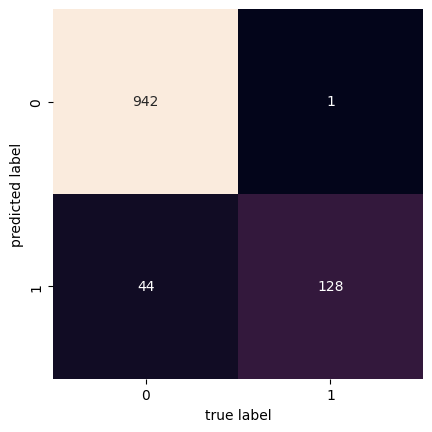

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Accuracy: 0.9623318385650225
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham'] ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


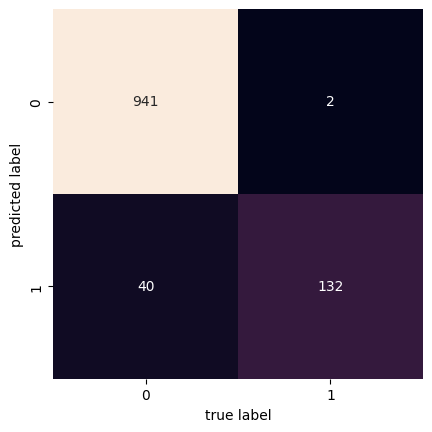

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(train_vector, y_train)

y_predict = classifier_NB.predict(test_vector)

score = classifier_NB.score(test_vector, y_test)
print("Accuracy:", score)
print(y_predict, y_test)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# **Neural Network**

In [ ]:


df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/spam.xlsx')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# เลือก v1	v2
df = df[['v1','v2']]

# เปลี่ยนชื่อให้เข้าใจง่าย
df = df.rename(columns={'v1': 'label', 'v2': 'sentence'})

In [ ]:
df['sentence'] = df['sentence'].astype(str)

In [ ]:
df

,label,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
print (df.shape)
print (df.label.value_counts())

(5572, 2)
ham     4825
spam     747
Name: label, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   sentence  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# สร้างฟังก์ชันสำหรับลบอักษรที่ผิดปกติด้วย regex
def remove_special_characters(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

# ใช้ฟังก์ชันที่สร้างขึ้นเพื่อลบอักษรผิดปกติในคอลัมน์ 'text'
df['sentence'] = df['sentence'].apply(remove_special_characters)

df['label'] = df['label'].replace({'ham': 0, 'spam': 1})
print(df)

      label                                           sentence
0         0  Go until jurong point crazy Available only in ...
1         0                            Ok lar Joking wif u oni
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0        U dun say so early hor U c already then say
4         0  Nah I dont think he goes to usf he lives aroun...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0                 Will  b going to esplanade fr home
5569      0  Pity  was in mood for that Soany other suggest...
5570      0  The guy did some bitching but I acted like id ...
5571      0                          Rofl Its true to its name

[5572 rows x 2 columns]


In [ ]:
print(df.shape)
print(df.label.value_counts())

from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values

(5572, 2)
0    4825
1     747
Name: label, dtype: int64


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [ ]:
train_vector = vectorizer_tfidf.fit(sentences_train)
train_vector =  vectorizer_tfidf.transform(sentences_train)
doc_term_matrix = train_vector.todense()
print(vectorizer_tfidf.get_feature_names_out())
df = pd.DataFrame(doc_term_matrix,columns = vectorizer_tfidf.get_feature_names_out())
print(df)

['0800' '08000839402' '08000930705' '10' '100' '1000' '10p' '12' '12hrs'
 '150' '150p' '150pmsg' '150ppm' '16' '18' '1st' '200' '2000' '2003'
 '2004' '250' '2nd' '300' '350' '500' '5000' '750' '800' '8007' '86688'
 '87066' '87077' 'abiola' 'able' 'about' 'abt' 'accept' 'account'
 'actually' 'address' 'admirer' 'aft' 'after' 'afternoon' 'again'
 'against' 'age' 'ago' 'ah' 'aight' 'aint' 'all' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'am' 'amp' 'an' 'and' 'angry'
 'another' 'ans' 'answer' 'any' 'anyone' 'anything' 'anytime' 'anyway'
 'apply' 'ard' 'are' 'area' 'around' 'as' 'asap' 'ask' 'asked' 'asking'
 'ass' 'at' 'attempt' 'auction' 'available' 'await' 'awaiting' 'award'
 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby' 'back' 'bad' 'bank' 'bath'
 'bday' 'be' 'beautiful' 'because' 'bed' 'been' 'before' 'being' 'believe'
 'best' 'better' 'between' 'big' 'bill' 'birthday' 'bit' 'blue' 'bonus'
 'book' 'bored' 'both' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brings' 'brother'

In [ ]:
test_vector = vectorizer_tfidf.transform(sentences_test)
doc_term_matrix = test_vector.todense()
print(vectorizer_tfidf.get_feature_names_out())
df = pd.DataFrame(doc_term_matrix,columns = vectorizer_tfidf.get_feature_names_out())
print(df)

['0800' '08000839402' '08000930705' '10' '100' '1000' '10p' '12' '12hrs'
 '150' '150p' '150pmsg' '150ppm' '16' '18' '1st' '200' '2000' '2003'
 '2004' '250' '2nd' '300' '350' '500' '5000' '750' '800' '8007' '86688'
 '87066' '87077' 'abiola' 'able' 'about' 'abt' 'accept' 'account'
 'actually' 'address' 'admirer' 'aft' 'after' 'afternoon' 'again'
 'against' 'age' 'ago' 'ah' 'aight' 'aint' 'all' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'am' 'amp' 'an' 'and' 'angry'
 'another' 'ans' 'answer' 'any' 'anyone' 'anything' 'anytime' 'anyway'
 'apply' 'ard' 'are' 'area' 'around' 'as' 'asap' 'ask' 'asked' 'asking'
 'ass' 'at' 'attempt' 'auction' 'available' 'await' 'awaiting' 'award'
 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby' 'back' 'bad' 'bank' 'bath'
 'bday' 'be' 'beautiful' 'because' 'bed' 'been' 'before' 'being' 'believe'
 'best' 'better' 'between' 'big' 'bill' 'birthday' 'bit' 'blue' 'bonus'
 'book' 'bored' 'both' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brings' 'brother'

In [ ]:
input_dim = train_vector.shape[1]  # Number of features
print(input_dim)

1000


In [ ]:

#For Neural Network
from keras import models
from keras.models import Sequential
from keras import layers
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.utils import pad_sequences




In [ ]:
from tensorflow import keras
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                10010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,021
Trainable params: 10,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#CountVectorizer
history = model.fit(train_vector, y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(test_vector, y_test),
                    batch_size=10)

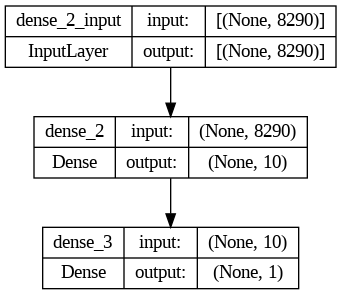

In [ ]:
plot_model(model, show_shapes=True, to_file='model_structure.png')

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9998


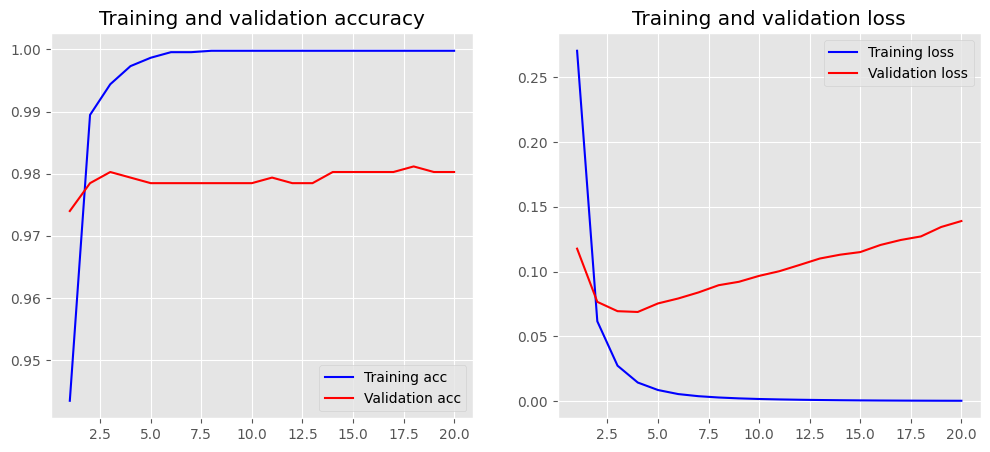

In [ ]:
#plot graph

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)